Tìm trọng số các tiêu chí tương ứng từ data aspect từ review đánh giá nhận xét của user

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
import os
import ast

### **EDA**

In [2]:
df  = pd.read_csv("C:\\Users\\DELL\\Downloads\\reviewer_data.csv")
df.head()

,id_review,country,room,state,rating,criteria,date,id
0,2367e2c2-8bb2-4a79-bc48-034fde283649,Việt Nam,Bungalow Deluxe Nhìn Ra Khu Vườn,Nhóm,Đạt điểm 10,"[['Phòng nghỉ & tiện nghi', 'Positive'], ['Cơ ...",2023-09-01,10000593
1,590605ee-34ba-4223-b132-22e25c298289,Việt Nam,Bungalow Nhìn ra vườn,Phòng gia đình,Đạt điểm 10,"[['Vị trí & môi trường', 'Positive'], ['Ẩm thự...",2023-09-01,10000593
2,4ca654b6-bd02-4546-8cf3-8411fca210b4,Việt Nam,Bungalow Deluxe Nhìn Ra Khu Vườn,Phòng gia đình,Đạt điểm 10,"[['Dịch vụ & nhân viên', 'Positive'], ['Vị trí...",2023-08-01,10000593
3,ff16e849-b2f6-4f33-a7db-2151ba37b0e3,Việt Nam,Suite Gia Đình,Phòng gia đình,"Đạt điểm 8,0","[['Vị trí & môi trường', 'Positive'], ['Dịch v...",2023-06-01,10000593
4,d3353974-b78f-438a-a639-8244e83eda71,Việt Nam,Bungalow Nhìn ra vườn,Nhóm,Đạt điểm 10,"[['Dịch vụ & nhân viên', 'Positive'], ['Vị trí...",2023-07-01,10000593


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878623 entries, 0 to 878622
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   id_review  878623 non-null  object
 1   country    876430 non-null  object
 2   room       876254 non-null  object
 3   state      876164 non-null  object
 4   rating     878532 non-null  object
 5   criteria   878623 non-null  object
 6   date       878594 non-null  object
 7   id         878623 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 53.6+ MB


In [ ]:
# Tập hợp tất cả các aspect
all_aspects = set()

for row in df['criteria']:
    try:
        parsed = ast.literal_eval(row)  
        for item in parsed:
            if isinstance(item, list) and len(item) == 2:
                all_aspects.add(item[0]) 
    except:
        continue  

print(all_aspects)

{'Ẩm thực', 'Giá trị', 'Phòng nghỉ & tiện nghi', 'Wi-Fi', 'Dịch vụ & nhân viên', 'An ninh', 'Vị trí & môi trường', 'Policies', 'Sạch sẽ', 'Cơ sở vật chất'}


In [7]:
df['criteria'][1]

"[['Vị trí & môi trường', 'Positive'], ['Ẩm thực', 'Mixed'], ['Phòng nghỉ & tiện nghi', 'Positive'], ['Cơ sở vật chất', 'Positive'], ['Sạch sẽ', 'Positive']]"

In [16]:
df.shape 

(878623, 18)

### **Preprocessing**

In [8]:
# Hàm xử lý từng dòng
def process_criteria(row):
    parsed = ast.literal_eval(row['criteria'])  # Chuyển chuỗi thành list
    for item in parsed:
        feature, sentiment = item
        row[feature] = sentiment
    row['Num_criteria'] = len(parsed)
    return row

# Áp dụng hàm cho từng dòng
df = df.apply(process_criteria, axis=1)

df.head()
df.to_csv('processed_criteria.csv', index=False, encoding='utf-8-sig')

In [ ]:
df= pd.read_csv('processed_criteria.csv')
df.head() 

,An ninh,Cơ sở vật chất,Dịch vụ & nhân viên,Giá trị,Num_criteria,Phòng nghỉ & tiện nghi,Sạch sẽ,Vị trí & môi trường,Wi-Fi,country,criteria,date,id,id_review,rating,room,state,Ẩm thực,Policies
0,NaN,Positive,Positive,NaN,5,Positive,NaN,Positive,NaN,Việt Nam,"[['Phòng nghỉ & tiện nghi', 'Positive'], ['Cơ ...",2023-09-01,10000593,2367e2c2-8bb2-4a79-bc48-034fde283649,Đạt điểm 10,Bungalow Deluxe Nhìn Ra Khu Vườn,Nhóm,Positive,NaN
1,NaN,Positive,NaN,NaN,5,Positive,Positive,Positive,NaN,Việt Nam,"[['Vị trí & môi trường', 'Positive'], ['Ẩm thự...",2023-09-01,10000593,590605ee-34ba-4223-b132-22e25c298289,Đạt điểm 10,Bungalow Nhìn ra vườn,Phòng gia đình,Mixed,NaN
2,NaN,Positive,Positive,NaN,4,Positive,NaN,Positive,NaN,Việt Nam,"[['Dịch vụ & nhân viên', 'Positive'], ['Vị trí...",2023-08-01,10000593,4ca654b6-bd02-4546-8cf3-8411fca210b4,Đạt điểm 10,Bungalow Deluxe Nhìn Ra Khu Vườn,Phòng gia đình,NaN,NaN
3,NaN,Positive,Positive,Positive,6,Positive,NaN,Positive,NaN,Việt Nam,"[['Vị trí & môi trường', 'Positive'], ['Dịch v...",2023-06-01,10000593,ff16e849-b2f6-4f33-a7db-2151ba37b0e3,"Đạt điểm 8,0",Suite Gia Đình,Phòng gia đình,Positive,NaN
4,NaN,NaN,Positive,NaN,3,Positive,NaN,Positive,NaN,Việt Nam,"[['Dịch vụ & nhân viên', 'Positive'], ['Vị trí...",2023-07-01,10000593,d3353974-b78f-438a-a639-8244e83eda71,Đạt điểm 10,Bungalow Nhìn ra vườn,Nhóm,NaN,NaN


In [12]:
df.shape


(878623, 19)

In [13]:
df.columns 

Index(['An ninh', 'Cơ sở vật chất', 'Dịch vụ & nhân viên', 'Giá trị',
       'Num_criteria', 'Phòng nghỉ & tiện nghi', 'Sạch sẽ',
       'Vị trí & môi trường', 'Wi-Fi', 'country', 'criteria', 'date', 'id',
       'id_review', 'rating', 'room', 'state', 'Ẩm thực', 'Policies'],
      dtype='object')

In [14]:
len(df['date'].unique())

55

In [ ]:
df['date'].unique() # thoi gian ghi nhận là tháng

array(['2023-09-01', '2023-08-01', '2023-06-01', '2023-07-01',
       '2023-05-01', '2024-09-01', '2024-04-01', '2024-08-01',
       '2024-07-01', '2024-05-01', '2024-02-01', '2024-12-01',
       '2024-01-01', '2024-11-01', '2024-10-01', '2023-11-01',
       '2023-10-01', '2025-01-01', '2025-02-01', '2024-06-01',
       '2024-03-01', '2025-03-01', '2023-12-01', '2023-03-01',
       '2022-11-01', '2022-10-01', '2022-08-01', '2022-07-01',
       '2022-06-01', '2022-04-01', '2023-02-01', '2022-09-01',
       '2023-01-01', '2022-12-01', '2023-04-01', '2022-05-01',
       '2022-03-01', '2022-02-01', '2025-10-01', '2026-03-01',
       '2026-09-01', nan, '2022-01-01', '2021-12-01', '2026-06-01',
       '2025-09-01', '2025-11-01', '2025-07-01', '1999-12-01',
       '2021-11-01', '2025-05-01', '2026-02-01', '2025-08-01',
       '2025-06-01', '2025-12-01'], dtype=object)

In [ ]:
# Danh sách các cột aspect
aspect_columns = [
    'Phòng nghỉ & tiện nghi', 'Giá trị', 'Cơ sở vật chất', 'Ẩm thực',
    'An ninh', 'Dịch vụ & nhân viên', 'Wi-Fi', 'Sạch sẽ', 'Vị trí & môi trường', 'Policies'
]

# Tạo bản sao tránh ảnh hưởng df gốc (tùy chọn)
df_count = df.copy()

# Chuyển các giá trị aspect thành 1 nếu khác NaN, 0 nếu là NaN
df_count[aspect_columns] = df_count[aspect_columns].notna().astype(int)

# Group theo date và tính tổng (tức là đếm số lần aspect có mặt mỗi ngày)
result = df_count.groupby('date')[aspect_columns].sum().reset_index()


In [16]:
# Danh sách các cột aspect
aspect_columns = [
    'Phòng nghỉ & tiện nghi', 'Giá trị', 'Cơ sở vật chất', 'Ẩm thực',
    'An ninh', 'Dịch vụ & nhân viên', 'Wi-Fi', 'Sạch sẽ', 'Vị trí & môi trường','Policies'
]

# Tạo bản sao tạm để xử lý
df_temp = df.copy()

# Chuyển aspect: notna() → True/False → int (1/0)
df_temp[aspect_columns] = df_temp[aspect_columns].notna().astype(int)

# Gộp groupby theo ngày
result = df_temp.groupby('date').agg(
    {**{col: 'sum' for col in aspect_columns}, 'Num_criteria': 'sum'}
).reset_index()

# Xem kết quả
result.head()

,date,Phòng nghỉ & tiện nghi,Giá trị,Cơ sở vật chất,Ẩm thực,An ninh,Dịch vụ & nhân viên,Wi-Fi,Sạch sẽ,Vị trí & môi trường,Policies,Num_criteria
0,1999-12-01,1,0,1,0,0,2,0,0,1,0,5
1,2021-11-01,0,0,0,1,0,0,0,0,0,0,1
2,2021-12-01,20,13,19,16,3,17,5,13,17,0,123
3,2022-01-01,83,45,67,57,7,71,12,43,80,0,465
4,2022-02-01,985,507,839,546,38,826,82,510,863,0,5196


In [ ]:
# Các aspect cần thống kê
aspect_columns = [
    'Phòng nghỉ & tiện nghi', 'Giá trị', 'Cơ sở vật chất', 'Ẩm thực',
    'An ninh', 'Dịch vụ & nhân viên', 'Wi-Fi', 'Sạch sẽ', 'Vị trí & môi trường','Policies'
]

# Bản sao xử lý
df_temp = df.copy()
df_temp[aspect_columns] = df_temp[aspect_columns].notna().astype(int)

# Group theo ngày: tính count aspect và sum Num_criteria
grouped = df_temp.groupby('date').agg(
    {**{col: 'sum' for col in aspect_columns}, 'Num_criteria': 'sum'}
).reset_index()

# Tính tỷ lệ: mỗi aspect chia cho Num_criteria
for col in aspect_columns:
    grouped[f'{col}_ratio'] = grouped[col] / grouped['Num_criteria']


In [25]:
grouped.head()

,date,Phòng nghỉ & tiện nghi,Giá trị,Cơ sở vật chất,Ẩm thực,An ninh,Dịch vụ & nhân viên,Wi-Fi,Sạch sẽ,Vị trí & môi trường,...,Phòng nghỉ & tiện nghi_ratio,Giá trị_ratio,Cơ sở vật chất_ratio,Ẩm thực_ratio,An ninh_ratio,Dịch vụ & nhân viên_ratio,Wi-Fi_ratio,Sạch sẽ_ratio,Vị trí & môi trường_ratio,Policies_ratio
0,1999-12-01,1,0,1,0,0,2,0,0,1,...,0.200000,0.000000,0.200000,0.000000,0.000000,0.400000,0.000000,0.000000,0.200000,0.00000
1,2021-11-01,0,0,0,1,0,0,0,0,0,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
2,2021-12-01,20,13,19,16,3,17,5,13,17,...,0.160000,0.104000,0.152000,0.128000,0.024000,0.136000,0.040000,0.104000,0.136000,0.01600
3,2022-01-01,83,45,67,57,7,71,12,43,80,...,0.177350,0.096154,0.143162,0.121795,0.014957,0.151709,0.025641,0.091880,0.170940,0.00641
4,2022-02-01,985,507,839,546,38,826,82,510,863,...,0.188553,0.097052,0.160605,0.104518,0.007274,0.158116,0.015697,0.097626,0.165199,0.00536


In [27]:
grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   date                          54 non-null     object 
 1   Phòng nghỉ & tiện nghi        54 non-null     int32  
 2   Giá trị                       54 non-null     int32  
 3   Cơ sở vật chất                54 non-null     int32  
 4   Ẩm thực                       54 non-null     int32  
 5   An ninh                       54 non-null     int32  
 6   Dịch vụ & nhân viên           54 non-null     int32  
 7   Wi-Fi                         54 non-null     int32  
 8   Sạch sẽ                       54 non-null     int32  
 9   Vị trí & môi trường           54 non-null     int32  
 10  Policies                      54 non-null     int64  
 11  Num_criteria                  54 non-null     int64  
 12  Phòng nghỉ & tiện nghi_ratio  54 non-null     float64
 13  Giá trị

In [ ]:
data = grouped.copy()
type(data)

pandas.core.frame.DataFrame

In [29]:
# Giả sử df là DataFrame bạn đang có
data['date'] = pd.to_datetime(data['date'])

# Tạo cột 'month' dạng 'YYYY-MM'
data['month'] = data['date'].dt.to_period('M').astype(str)

In [30]:
data.head()

,date,Phòng nghỉ & tiện nghi,Giá trị,Cơ sở vật chất,Ẩm thực,An ninh,Dịch vụ & nhân viên,Wi-Fi,Sạch sẽ,Vị trí & môi trường,...,Giá trị_ratio,Cơ sở vật chất_ratio,Ẩm thực_ratio,An ninh_ratio,Dịch vụ & nhân viên_ratio,Wi-Fi_ratio,Sạch sẽ_ratio,Vị trí & môi trường_ratio,Policies_ratio,month
0,1999-12-01,1,0,1,0,0,2,0,0,1,...,0.000000,0.200000,0.000000,0.000000,0.400000,0.000000,0.000000,0.200000,0.00000,1999-12
1,2021-11-01,0,0,0,1,0,0,0,0,0,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,2021-11
2,2021-12-01,20,13,19,16,3,17,5,13,17,...,0.104000,0.152000,0.128000,0.024000,0.136000,0.040000,0.104000,0.136000,0.01600,2021-12
3,2022-01-01,83,45,67,57,7,71,12,43,80,...,0.096154,0.143162,0.121795,0.014957,0.151709,0.025641,0.091880,0.170940,0.00641,2022-01
4,2022-02-01,985,507,839,546,38,826,82,510,863,...,0.097052,0.160605,0.104518,0.007274,0.158116,0.015697,0.097626,0.165199,0.00536,2022-02


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   date                          54 non-null     datetime64[ns]
 1   Phòng nghỉ & tiện nghi        54 non-null     int32         
 2   Giá trị                       54 non-null     int32         
 3   Cơ sở vật chất                54 non-null     int32         
 4   Ẩm thực                       54 non-null     int32         
 5   An ninh                       54 non-null     int32         
 6   Dịch vụ & nhân viên           54 non-null     int32         
 7   Wi-Fi                         54 non-null     int32         
 8   Sạch sẽ                       54 non-null     int32         
 9   Vị trí & môi trường           54 non-null     int32         
 10  Policies                      54 non-null     int64         
 11  Num_criteria                  54 n

In [32]:
out_range_time = data[data['date'].dt.year.isin([1999, 2026])]

In [33]:
data = data[~data['date'].dt.year.isin([1999, 2026])]


In [34]:
data['date'] = pd.to_datetime(data['date'])
data = data[data['date'] < '2025-03-01']


In [35]:
# Lấy danh sách các cột ratio
ratio_cols = [col for col in data.columns if '_ratio' in col]

# Lọc các dòng KHÔNG có bất kỳ giá trị nào bằng 1 trong các cột ratio
data = data[~(data[ratio_cols] == 1).any(axis=1)]


In [36]:
data.shape

(39, 23)

In [37]:
data['date'] = data['date'].dt.strftime('%m/%Y')

In [38]:
data['date'].unique()

array(['12/2021', '01/2022', '02/2022', '03/2022', '04/2022', '05/2022',
       '06/2022', '07/2022', '08/2022', '09/2022', '10/2022', '11/2022',
       '12/2022', '01/2023', '02/2023', '03/2023', '04/2023', '05/2023',
       '06/2023', '07/2023', '08/2023', '09/2023', '10/2023', '11/2023',
       '12/2023', '01/2024', '02/2024', '03/2024', '04/2024', '05/2024',
       '06/2024', '07/2024', '08/2024', '09/2024', '10/2024', '11/2024',
       '12/2024', '01/2025', '02/2025'], dtype=object)

In [39]:
data.to_csv('criteria_ratio_data.csv', index=False, encoding='utf-8-sig')

### **Begin**

In [40]:
data = pd.read_csv('criteria_ratio_data.csv')
data.head()

,date,Phòng nghỉ & tiện nghi,Giá trị,Cơ sở vật chất,Ẩm thực,An ninh,Dịch vụ & nhân viên,Wi-Fi,Sạch sẽ,Vị trí & môi trường,...,Giá trị_ratio,Cơ sở vật chất_ratio,Ẩm thực_ratio,An ninh_ratio,Dịch vụ & nhân viên_ratio,Wi-Fi_ratio,Sạch sẽ_ratio,Vị trí & môi trường_ratio,Policies_ratio,month
0,12/2021,20,13,19,16,3,17,5,13,17,...,0.104000,0.152000,0.128000,0.024000,0.136000,0.040000,0.104000,0.136000,0.016000,2021-12
1,01/2022,83,45,67,57,7,71,12,43,80,...,0.096154,0.143162,0.121795,0.014957,0.151709,0.025641,0.091880,0.170940,0.006410,2022-01
2,02/2022,985,507,839,546,38,826,82,510,863,...,0.097052,0.160605,0.104518,0.007274,0.158116,0.015697,0.097626,0.165199,0.005360,2022-02
3,03/2022,3679,1785,3167,1931,108,3285,294,2211,3195,...,0.090752,0.161015,0.098175,0.005491,0.167014,0.014947,0.112410,0.162438,0.000712,2022-03
4,04/2022,7072,3953,6271,4416,429,6632,1085,4368,6336,...,0.097202,0.154200,0.108587,0.010549,0.163077,0.026679,0.107406,0.155798,0.002606,2022-04


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   date                          39 non-null     object 
 1   Phòng nghỉ & tiện nghi        39 non-null     int64  
 2   Giá trị                       39 non-null     int64  
 3   Cơ sở vật chất                39 non-null     int64  
 4   Ẩm thực                       39 non-null     int64  
 5   An ninh                       39 non-null     int64  
 6   Dịch vụ & nhân viên           39 non-null     int64  
 7   Wi-Fi                         39 non-null     int64  
 8   Sạch sẽ                       39 non-null     int64  
 9   Vị trí & môi trường           39 non-null     int64  
 10  Policies                      39 non-null     int64  
 11  Num_criteria                  39 non-null     int64  
 12  Phòng nghỉ & tiện nghi_ratio  39 non-null     float64
 13  Giá trị

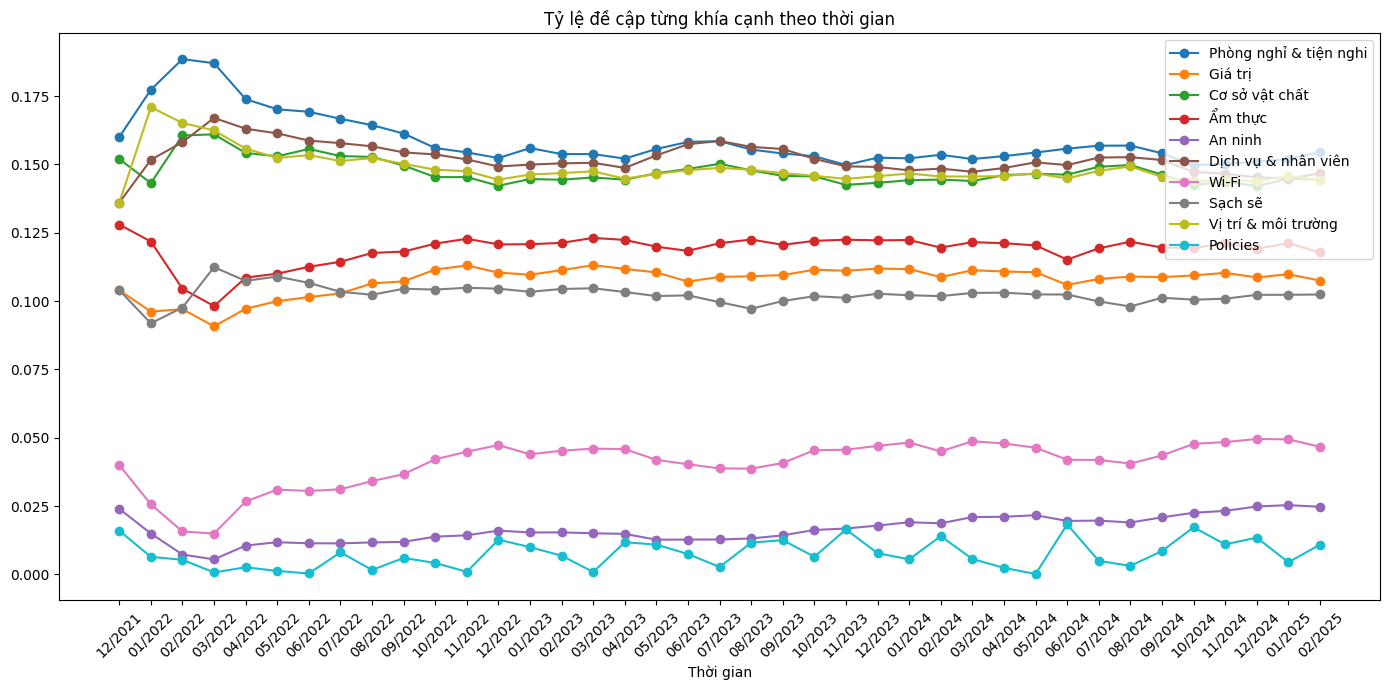

In [5]:
plt.figure(figsize=(14, 7))
for col in [c for c in data.columns if '_ratio' in c]:
    plt.plot(data['date'], data[col], marker='o', label=col.replace('_ratio', ''))

plt.xlabel('Thời gian')
#plt.ylabel('Tỷ lệ xuất hiện aspect')
plt.title('Tỷ lệ đề cập từng khía cạnh theo thời gian')
plt.legend(loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


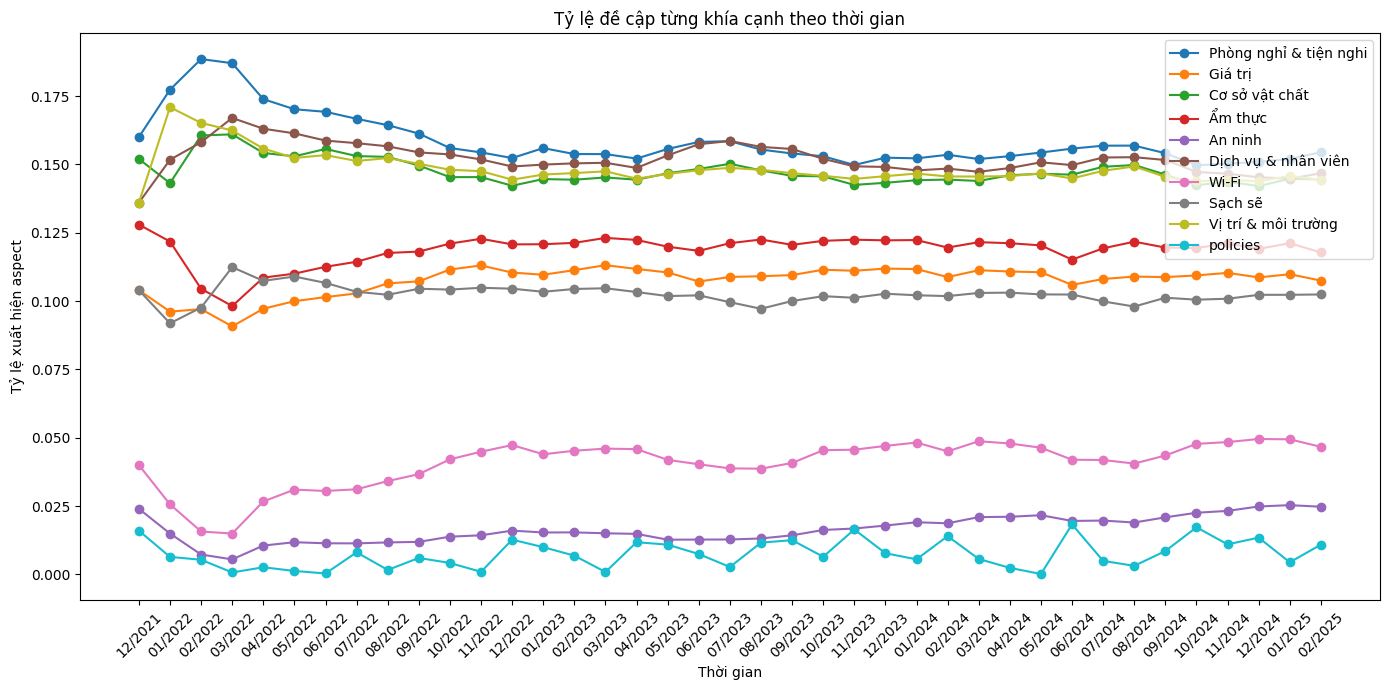

In [50]:
plt.figure(figsize=(14, 7))
for col in [c for c in data.columns if '_ratio' in c]:
    plt.plot(data['date'], data[col], marker='o', label=col.replace('_ratio', ''))

plt.xlabel('Thời gian')
plt.ylabel('Tỷ lệ xuất hiện aspect')
plt.title('Tỷ lệ đề cập từng khía cạnh theo thời gian')
plt.legend(loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [42]:
# Gộp các aspect vào nhóm tương ứng
group_map = {
    'location': ['Vị trí & môi trường', 'An ninh'],
    'price': ['Giá trị'],
    'room': ['Phòng nghỉ & tiện nghi', 'Sạch sẽ'],
    'services': ['Dịch vụ & nhân viên'],
    'amenities': ['Cơ sở vật chất', 'Wi-Fi', 'Ẩm thực'],
    'policies': ['Policies']
}

# Tạo cột mới bằng cách tính trung bình tỷ lệ của các aspect trong từng nhóm
new_data = pd.DataFrame()
new_data['date'] = data['date']  # Giữ lại cột thời gian

for group, aspects in group_map.items():
    aspect_ratio_cols = [f"{a}_ratio" for a in aspects]
    new_data[group] = data[aspect_ratio_cols].sum(axis=1) 

new_data.head()

,date,location,price,room,services,amenities,policies
0,12/2021,0.160000,0.104000,0.264000,0.136000,0.320000,0.016000
1,01/2022,0.185897,0.096154,0.269231,0.151709,0.290598,0.006410
2,02/2022,0.172473,0.097052,0.286179,0.158116,0.280819,0.005360
3,03/2022,0.167929,0.090752,0.299456,0.167014,0.274137,0.000712
4,04/2022,0.166347,0.097202,0.281302,0.163077,0.289466,0.002606


In [43]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       39 non-null     object 
 1   location   39 non-null     float64
 2   price      39 non-null     float64
 3   room       39 non-null     float64
 4   services   39 non-null     float64
 5   amenities  39 non-null     float64
 6   policies   39 non-null     float64
dtypes: float64(6), object(1)
memory usage: 2.3+ KB


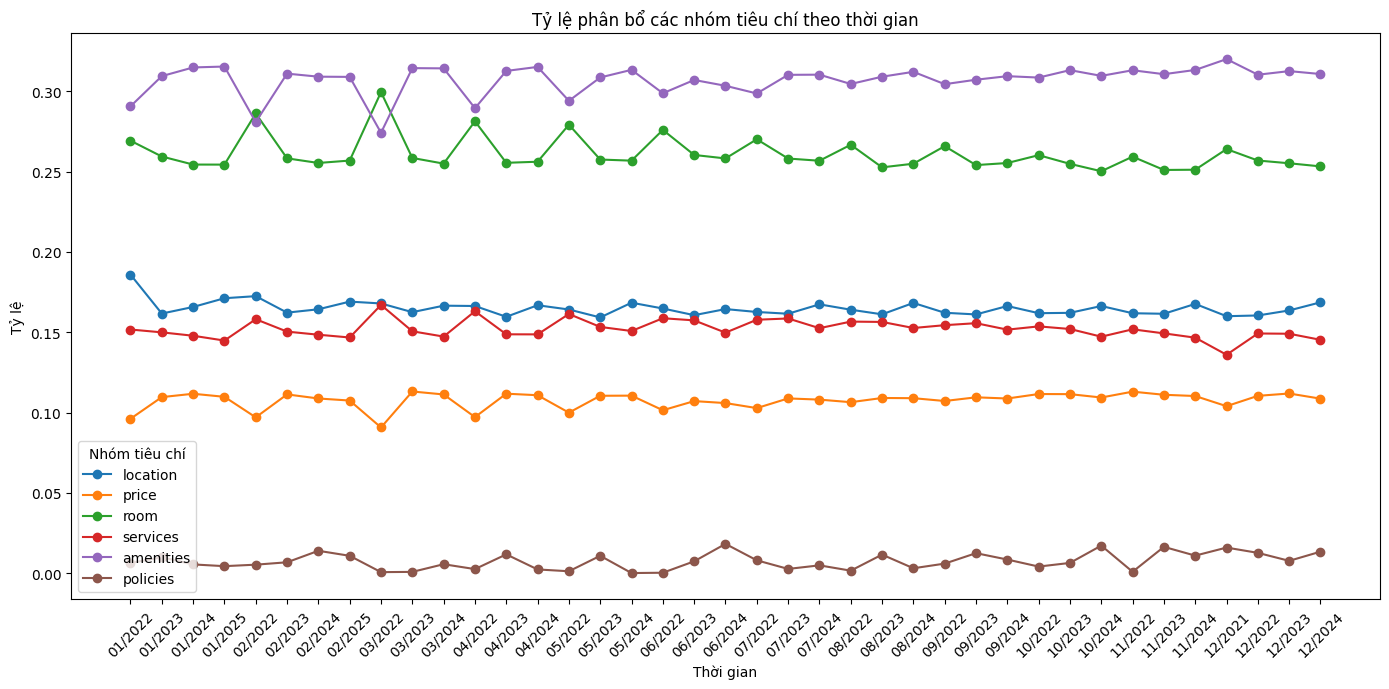

In [44]:
import matplotlib.pyplot as plt

# Chọn các cột nhóm để vẽ
groups = ['location', 'price', 'room', 'services', 'amenities','policies']

# Đảm bảo dữ liệu được sắp xếp theo thời gian
new_data = new_data.sort_values('date')

# Vẽ biểu đồ đường
plt.figure(figsize=(14, 7))
for group in groups:
    plt.plot(new_data['date'], new_data[group], marker='o', label=group)

plt.title('Tỷ lệ phân bổ các nhóm tiêu chí theo thời gian')
plt.xlabel('Thời gian')
plt.ylabel('Tỷ lệ')
plt.xticks(rotation=45)
plt.legend(title='Nhóm tiêu chí')
plt.tight_layout()
plt.show()


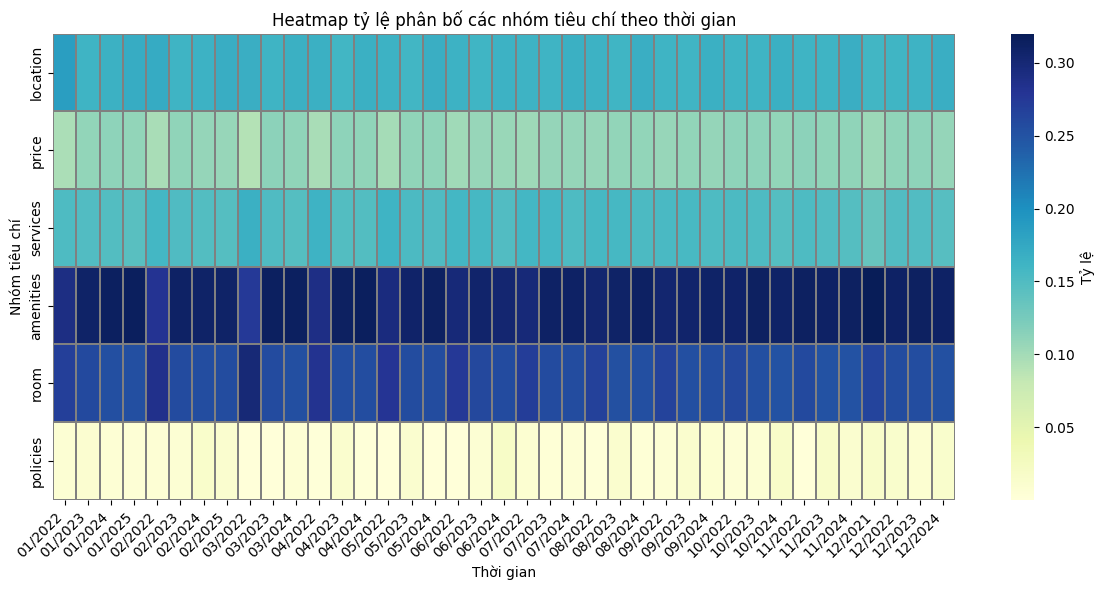

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cột nhóm
group_cols = ['location', 'price',  'services', 'amenities', 'room','policies']

# Sắp xếp theo ngày
new_data = new_data.sort_values('date')

# Đặt 'date' làm chỉ mục
heatmap_data = new_data.set_index('date')[group_cols]

# Vẽ heatmap với colormap dễ phân biệt
plt.figure(figsize=(12, 6))
sns.heatmap(
    heatmap_data.T,                # transpose để tiêu chí theo hàng
    cmap='YlGnBu',                 # hoặc thử 'Spectral', 'coolwarm', 'viridis'
    cbar_kws={'label': 'Tỷ lệ'},
    linewidths=0.2,
    linecolor='gray'
)

plt.title("Heatmap tỷ lệ phân bố các nhóm tiêu chí theo thời gian")
plt.xlabel("Thời gian")
plt.ylabel("Nhóm tiêu chí")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [52]:
# Tạo cột tháng từ date
# Giả sử cột 'date' có dạng chuỗi 'MM/YYYY'
new_data['month'] = new_data['date'].str.split('/').str[0].astype(int)
new_data['year'] = new_data['date'].str.split('/').str[1].astype(int)
# Tính trung bình các tỷ lệ theo từng tháng (không phân biệt năm)
monthly_avg = new_data.groupby('month')[['location', 'price', 'room', 'services', 'amenities','policies']].mean()


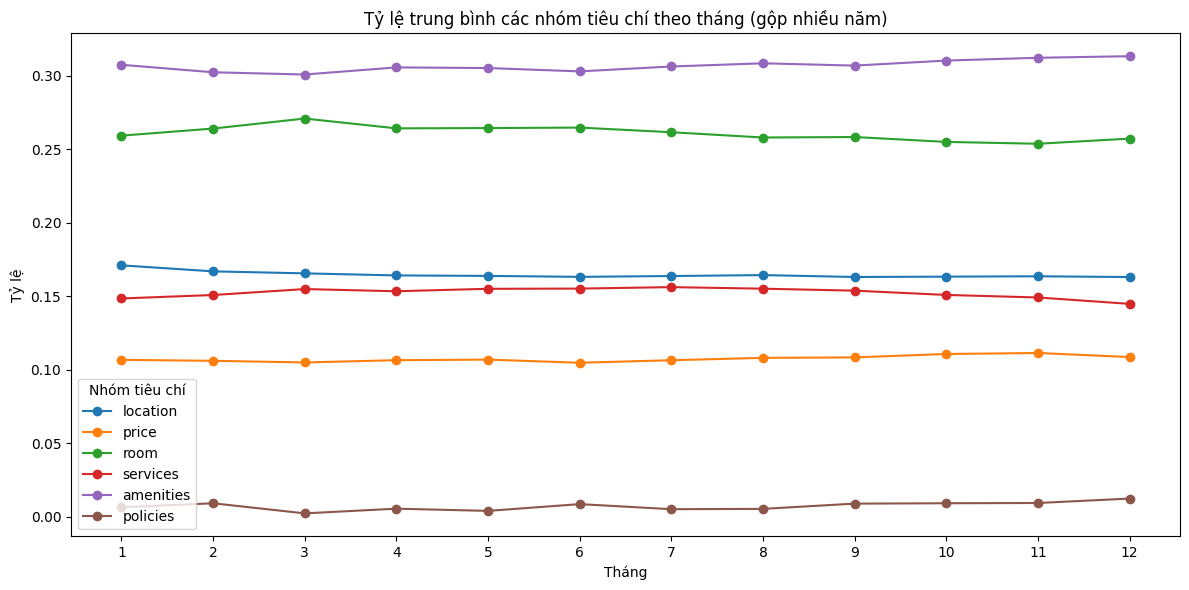

In [59]:
import matplotlib.pyplot as plt

monthly_avg.plot(kind='line', marker='o', figsize=(12, 6))
plt.title('Tỷ lệ trung bình các nhóm tiêu chí theo tháng (gộp nhiều năm)')
plt.xlabel('Tháng')
plt.ylabel('Tỷ lệ')
plt.xticks(range(1, 13))
#plt.grid(True)
plt.legend(title='Nhóm tiêu chí')
plt.tight_layout()
plt.show()


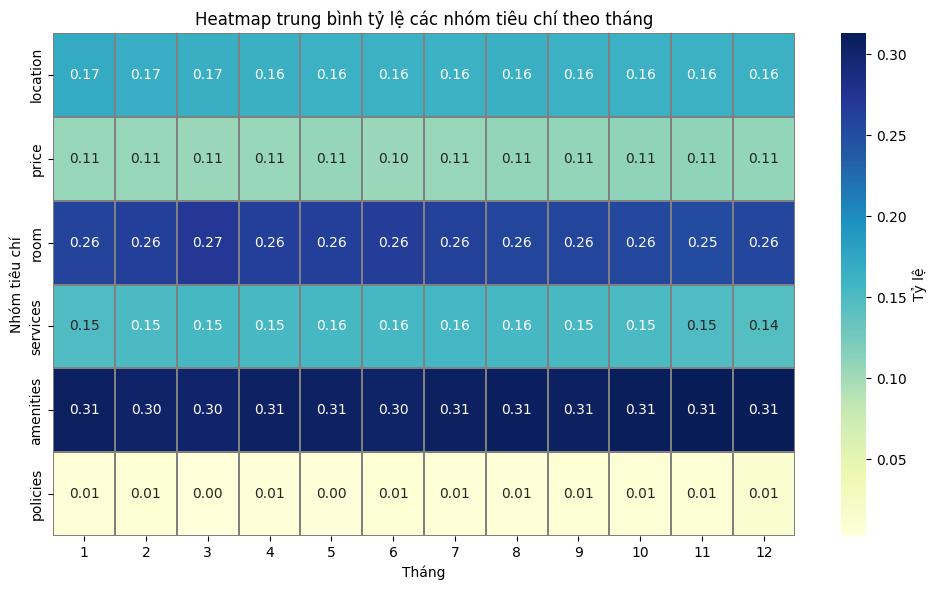

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Giả sử cột 'date' là chuỗi dạng 'MM/YYYY'
new_data['month'] = new_data['date'].str.split('/').str[0].astype(int)
new_data['year'] = new_data['date'].str.split('/').str[1].astype(int)

# Trung bình tỷ lệ theo tháng (bỏ qua năm)
group_cols = ['location', 'price', 'room', 'services', 'amenities', 'policies']
monthly_avg = new_data.groupby('month')[group_cols].mean().T  # .T để nhóm là hàng

# Vẽ heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    monthly_avg,
    cmap='YlGnBu',  # hoặc thử 'coolwarm', 'Spectral', 'viridis'...
    annot=True,     # hiện giá trị tỷ lệ nếu muốn
    fmt=".2f",      # hiển thị 2 chữ số sau dấu phẩy
    cbar_kws={'label': 'Tỷ lệ'},
    linewidths=0.3,
    linecolor='gray'
)

plt.title('Heatmap trung bình tỷ lệ các nhóm tiêu chí theo tháng')
plt.xlabel('Tháng')
plt.ylabel('Nhóm tiêu chí')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


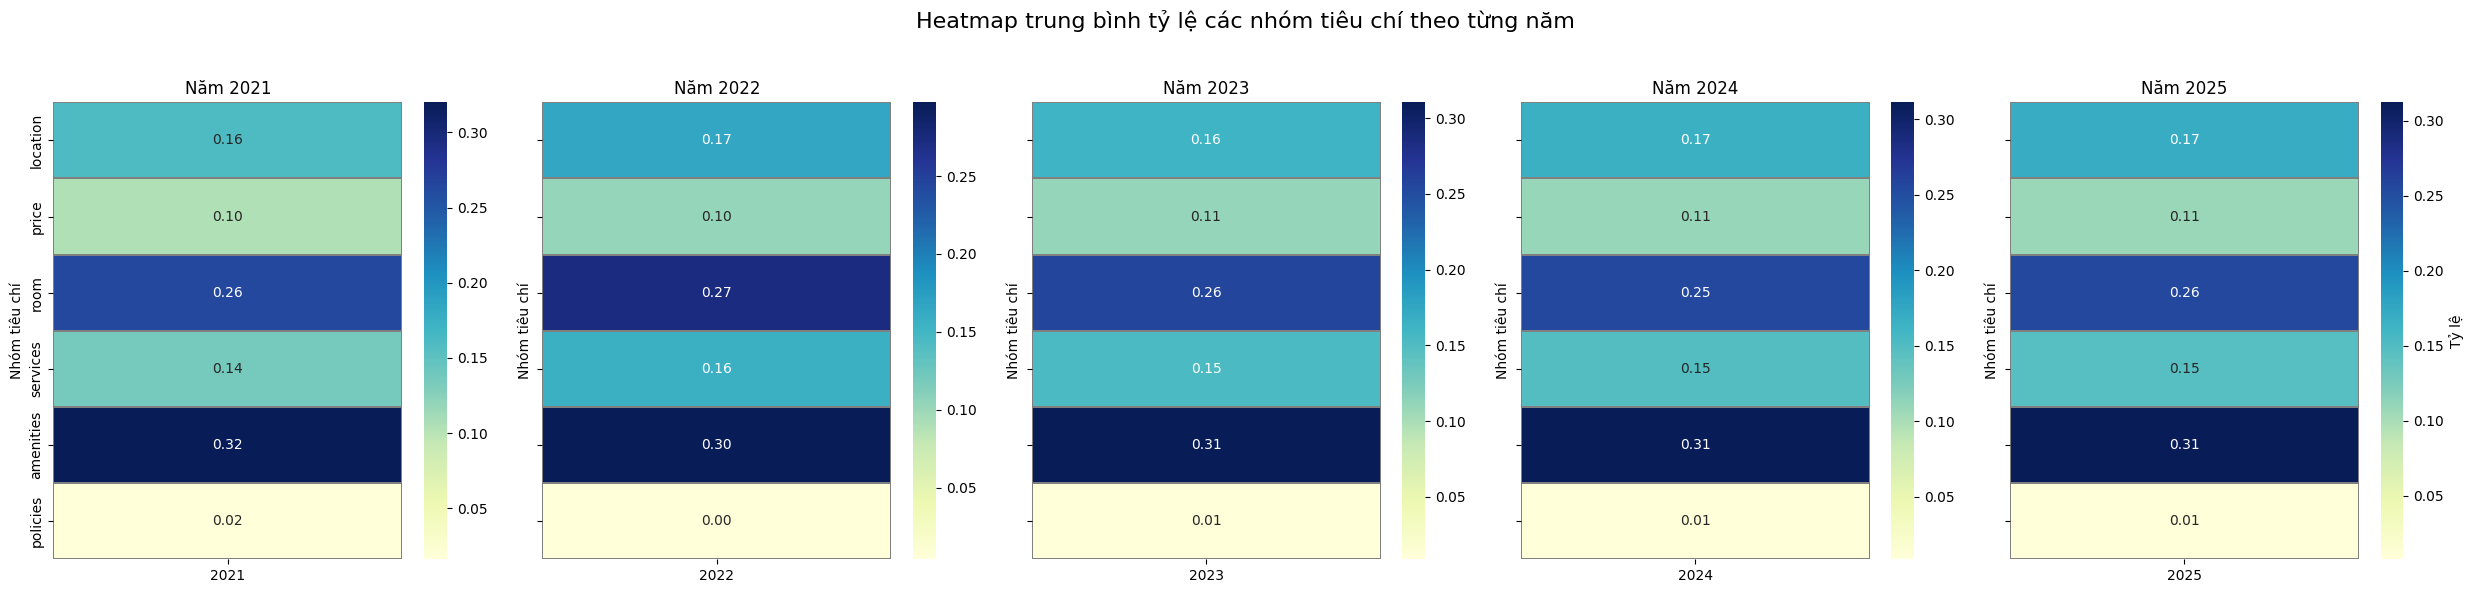

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Nhóm theo năm và tính trung bình
group_cols = ['location', 'price', 'room', 'services', 'amenities', 'policies']
yearly_avg = new_data.groupby('year')[group_cols].mean()

# Danh sách các năm
years = yearly_avg.index.tolist()
num_years = len(years)

# Tạo subplot theo số năm
fig, axs = plt.subplots(1, num_years, figsize=(5 * num_years, 6), sharey=True)

# Nếu chỉ có 1 năm thì axs không phải list, nên ép lại thành list
if num_years == 1:
    axs = [axs]

# Vẽ heatmap cho từng năm
for i, year in enumerate(years):
    data = yearly_avg.loc[year].to_frame().T  # Chuyển về dạng dataframe có group là hàng
    sns.heatmap(
        data.T,
        ax=axs[i],
        cmap='YlGnBu',        # Bạn có thể thay bằng 'Spectral', 'coolwarm', v.v.
        annot=True,
        fmt=".2f",
        cbar_kws={'label': 'Tỷ lệ'} if i == num_years - 1 else None,
        linewidths=0.3,
        linecolor='gray'
    )
    axs[i].set_title(f'Năm {year}')
    axs[i].set_xlabel('')  # Không cần nhãn cột
    axs[i].set_ylabel('Nhóm tiêu chí')

plt.suptitle('Heatmap trung bình tỷ lệ các nhóm tiêu chí theo từng năm', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


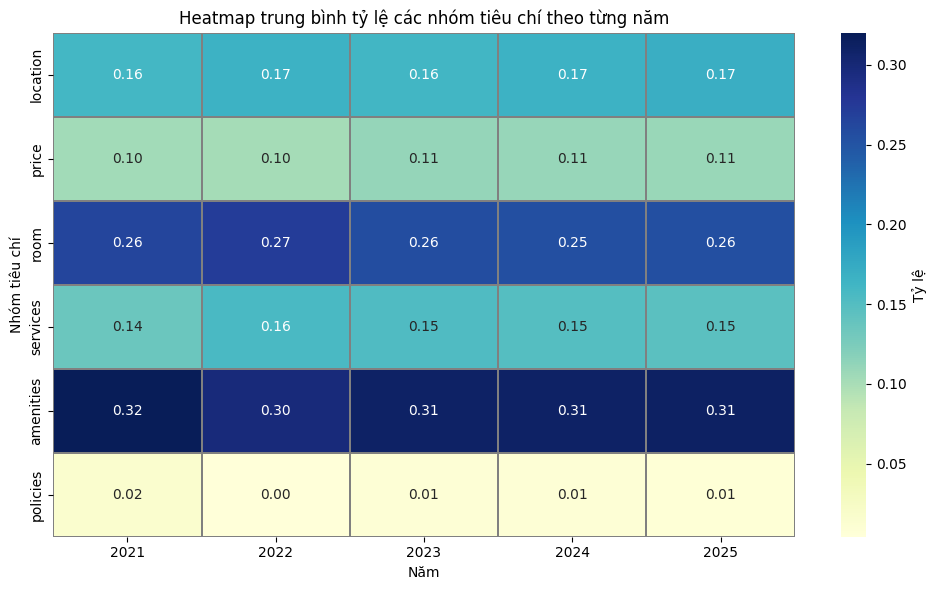

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cột nhóm tiêu chí
group_cols = ['location', 'price', 'room', 'services', 'amenities', 'policies']

# Tính trung bình các tỷ lệ theo từng năm
yearly_avg = new_data.groupby('year')[group_cols].mean().T  # .T để nhóm là hàng, năm là cột

# Vẽ heatmap duy nhất
plt.figure(figsize=(10, 6))
sns.heatmap(
    yearly_avg,
    cmap='YlGnBu',         # Gợi ý khác: 'coolwarm', 'Spectral', 'viridis'
    annot=True,
    fmt=".2f",
    cbar_kws={'label': 'Tỷ lệ'},
    linewidths=0.3,
    linecolor='gray'
)

plt.title('Heatmap trung bình tỷ lệ các nhóm tiêu chí theo từng năm')
plt.xlabel('Năm')
plt.ylabel('Nhóm tiêu chí')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


### **Kiểm định giải thuyết**

Giả thuyết kiểm định (Test of Homogeneity / Independence)
- Giả thuyết không (H₀):
Tỷ lệ các nhóm tiêu chí không thay đổi theo thời gian (nghĩa là phân phối của location, price, room, services, amenities là như nhau giữa các tháng hoặc năm).

- Giả thuyết đối (H₁):
Tỷ lệ có thay đổi theo thời gian, nghĩa là ít nhất một nhóm có phân phối khác.

In [63]:
from scipy.stats import f_oneway

# Giả sử bạn đang kiểm định theo tháng
grouped = new_data.groupby('month')

results = {}
for col in ['location', 'price', 'room', 'services', 'amenities','policies']:
    # Tạo danh sách các giá trị theo tháng
    values_by_month = [group[col].values for name, group in grouped]
    stat, pval = f_oneway(*values_by_month)
    results[col] = pval

# In kết quả
for aspect, p in results.items():
    print(f"{aspect}: p-value = {p:.4f} → {'Không đủ bằng chứng bác bỏ H₀' if p > 0.05 else 'Bác bỏ H₀ – Có sự khác biệt theo thời gian'}")


location: p-value = 0.6024 → Không đủ bằng chứng bác bỏ H₀
price: p-value = 0.9417 → Không đủ bằng chứng bác bỏ H₀
room: p-value = 0.8212 → Không đủ bằng chứng bác bỏ H₀
services: p-value = 0.1816 → Không đủ bằng chứng bác bỏ H₀
amenities: p-value = 0.9156 → Không đủ bằng chứng bác bỏ H₀
policies: p-value = 0.4584 → Không đủ bằng chứng bác bỏ H₀


H₀ (Giả thuyết không): Phân phối tỷ lệ các nhóm tiêu chí là giống nhau giữa các tháng (hoặc năm).

H₁ (Giả thuyết đối): Có ít nhất một thời điểm (tháng/năm) có phân phối khác biệt.

In [64]:
table = new_data.groupby('month')[['location', 'price', 'room', 'services', 'amenities','policies']].mean()

from scipy.stats import chi2_contingency

# Chuyển bảng thành numpy array
chi2_stat, p_val, dof, expected = chi2_contingency(table.values)

print(f"Chi² statistic = {chi2_stat:.4f}")
print(f"p-value = {p_val:.4f}")
print(f"Degrees of freedom = {dof}")

# Kết luận
if p_val > 0.05:
    print("✅ Không đủ bằng chứng bác bỏ H₀: Phân phối các nhóm tiêu chí không thay đổi theo thời gian.")
else:
    print("❌ Bác bỏ H₀: Có sự thay đổi phân phối các nhóm tiêu chí theo thời gian.")


Chi² statistic = 0.0155
p-value = 1.0000
Degrees of freedom = 55
✅ Không đủ bằng chứng bác bỏ H₀: Phân phối các nhóm tiêu chí không thay đổi theo thời gian.


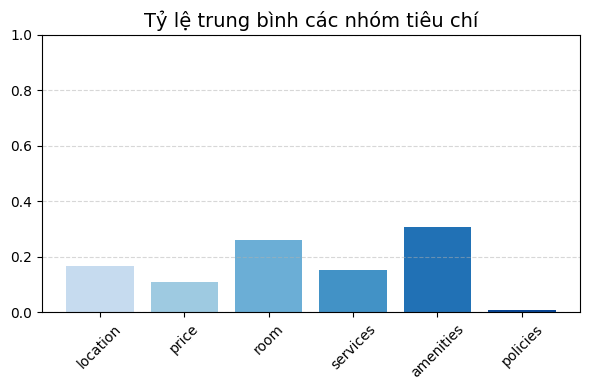

In [68]:
import matplotlib.pyplot as plt

# Danh sách các nhóm
groups = ['location', 'price', 'room', 'services', 'amenities', 'policies']
colors = ['#c6dbef', '#9ecae1', '#6baed6', '#4292c6', '#2171b5', '#084594']

# Tính trung bình toàn bộ dữ liệu
overall_avg = new_data[groups].mean()

# Vẽ biểu đồ cột duy nhất
plt.figure(figsize=(6, 4))
plt.bar(groups, overall_avg, color=colors)
plt.title('Tỷ lệ trung bình các nhóm tiêu chí', fontsize=14)
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [69]:
# Danh sách các cột nhóm
group_cols = ['location', 'price', 'room', 'services', 'amenities','policies']

# Tính trung bình mỗi cột
weights = new_data[group_cols].mean()

# Chuẩn hóa về tỉ lệ phần trăm (nếu muốn)
normalized_weights = weights / weights.sum()

# Hiển thị theo tỉ lệ x1:x2:x3:x4:x5
ratio = normalized_weights / normalized_weights.min()
ratio_rounded = ratio.round(2)

print("Tỷ lệ trung bình (xấp xỉ):")
for name, val in zip(group_cols, ratio_rounded):
    print(f"{name}: {val}")


Tỷ lệ trung bình (xấp xỉ):
location: 22.1
price: 14.41
room: 34.96
services: 20.37
amenities: 41.12
policies: 1.0


In [70]:
avg_weights = new_data[['location', 'price', 'room', 'services', 'amenities','policies']].mean()
final_weights = avg_weights / avg_weights.sum()  # chuẩn hóa để tổng = 1
final_weights 

location     0.164936
price        0.107545
room         0.260977
services     0.152090
amenities    0.306987
policies     0.007465
dtype: float64

In [71]:
# Bước 1: Lấy trung bình từng cột
group_cols =['location', 'price', 'room', 'services', 'amenities','policies']
avg_weights = new_data[group_cols].mean()

# Bước 2: Chuẩn hóa tổng = 1
normalized_weights = avg_weights / avg_weights.sum()

# Bước 3: Quy về tổng = 0.9
final_weights = normalized_weights * 0.9

# In kết quả
print("Trọng số sau khi chuẩn hóa về tổng = 0.9:")
for name, val in final_weights.items():
    print(f"{name}: {val:.4f}")


Trọng số sau khi chuẩn hóa về tổng = 0.9:
location: 0.1484
price: 0.0968
room: 0.2349
services: 0.1369
amenities: 0.2763
policies: 0.0067
